# Windowed-Sinc Filters
Windowed-sinc filters are used to separate one band of frequencies from another. They are very stable, produce few surprises, and can be pushed to incredible performance levels. These exceptional frequency domain characteristics are obtained at the expense of poor performance in the time domain, including excessive ripple and overshoot in the step response. When carried out by standard convolution, windowed-sinc filters are easy to program, but slow to execute. 

$$ h[i]=\frac{\sin{(2\pi f_{c}i)}}{i\pi}$$

Shited version
$$ h[i]=\frac{\sin{(2\pi f_{c}(i-M/2))}}{(i-M/2)\pi}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sinc_function(i,fc):
    """ 
    Function that calculates a sinc time response.
  
    Parameters: 
    i (numpy array): Array of numbers representing the samples being used to construct the sinc response.
    fc (float): Cut-off frequency for the low-pass filter. Between 0 and 0.5.
  
    Returns: 
    numpy array: Returns sinc time domain response.
    """
    h = np.zeros(len(i))
    h[1:] = (np.sin(2*np.pi*i[1:]*fc))/(i[1:]*np.pi)
    h[0] = 2*fc
    return h

def shifted_sinc_function(i,fc, M):
    """ 
    Function that calculates a sinc shifted time response.
  
    Parameters: 
    i (numpy array): Array of numbers representing the samples being used to construct the sinc response.
    fc (float): Cut-off frequency for the low-pass filter. Between 0 and 0.5.
    M (int): Length of the filter kernel. Usually M = 4/BW, where BW is the filter bandwidth of the transition band.
  
    Returns: 
    numpy array: Returns sinc shifted time domain response.
    """
    limit = np.where(i == M/2)[0][0]
    h = np.zeros(len(i))
    h[:limit] = (np.sin(2*np.pi*(i[:limit]-M/2)*fc))/((i[:limit]-M/2)*np.pi)
    h[limit+1:] = (np.sin(2*np.pi*(i[limit+1:]-M/2)*fc))/((i[limit+1:]-M/2)*np.pi)
    h[limit] = 2*fc
    return h

In order to develop the filter, two parameters must be selected:
1. The cut-off frequency, $0\leq f_c \leq 0.5$
2. The lenght of the filter kernel, $M=\frac{4}{BW}$, where $BW$ is the transition bandwidth (say, 99% to 1% of the curve).

In [5]:
fc = 0.20
BW = 0.04
M = int(4/BW)
i = np.arange(0,M,1)

print("Filter lenght is {}".format(M))

Filter lenght is 100


The **cutoff frequency** of the windowed-sinc filter is measured at the **one-half amplitude point**. Why use 0.5 instead of the standard 0.707 (-3dB) used in analog electronics and other digital filters? This is because the windowed-sinc's frequency response is symmetrical between the passband and the stopband. For instance, the Hamming window results in a passband ripple of 0.2%, and an identical stopband attenuation (i.e., ripple in the stopband) of 0.2%. Other filters do not show this symmetry, and therefore have no advantage in using the one-half amplitude point to mark the cutoff frequency. This symmetry makes the windowed-sinc ideal for spectral inversion.

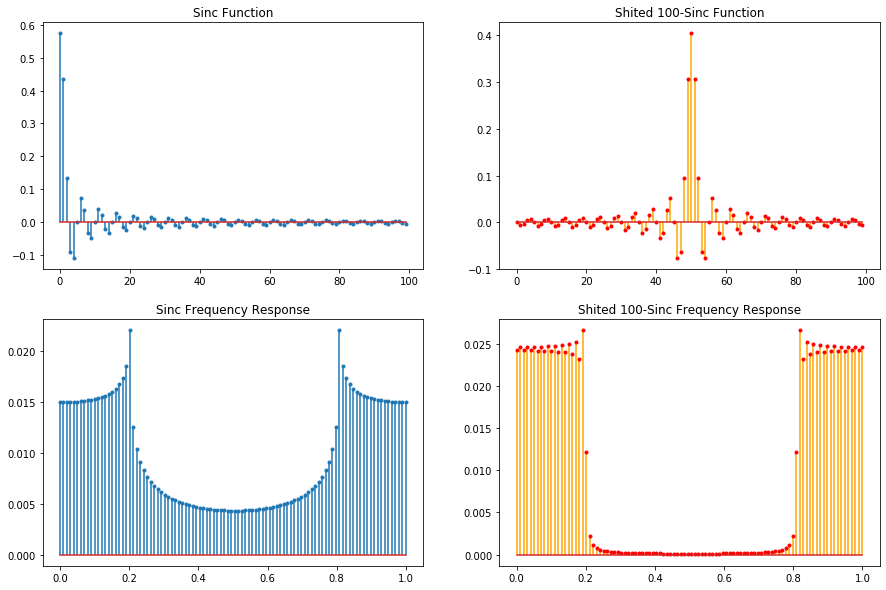

In [9]:
sinc = sinc_function(i,fc)
shifted_sinc = shifted_sinc_function(i,fc, M)

normalized_sinc = sinc/np.sum(sinc)
normalized_shifted_sinc = shifted_sinc/np.sum(shifted_sinc)

fft_sinc = np.fft.fft(sinc)
fft_shifted_sinc = np.fft.fft(shifted_sinc)

normalized_fft_sinc = np.absolute(fft_sinc)/np.sum(np.absolute(fft_sinc))
normalized_fft_shifted_sinc = np.absolute(fft_shifted_sinc)/np.sum(np.absolute(fft_shifted_sinc))

plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.stem(i, normalized_sinc, markerfmt='.', use_line_collection=True)
plt.title('Sinc Function')

plt.subplot(2,2,2)
plt.stem(i, normalized_shifted_sinc, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('Shited {}-Sinc Function'.format(M))


plt.subplot(2,2,3)
plt.stem(i/np.max(i), normalized_fft_sinc, markerfmt='.', use_line_collection=True)
plt.title('Sinc Frequency Response')


plt.subplot(2,2,4)
plt.stem(i/np.max(i), normalized_fft_shifted_sinc, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('Shited {}-Sinc Frequency Response'.format(M));


## Hamming and Blackman Windows
A window function is a mathematical function that is zero-valued outside of some chosen interval, normally symmetric around the middle of the interval, usually near a maximum in the middle, and usually tapering away from the middle. Mathematically, when another function or waveform/data-sequence is "multiplied" by a window function, the product is also zero-valued outside the interval: all that is left is the part where they overlap, the "view through the window"

In [11]:
def hamming_window(i, M):
    """ 
    Function that calculates a Hamming window of a given M-kernel.
  
    Parameters: 
    i (numpy array): Array of numbers representing the samples being used to construct the Hamming window.
    M (int): Length of the filter kernel. Usually M = 4/BW, where BW is the filter bandwidth of the transition band.
  
    Returns: 
    numpy array: Returns Hamming window of a given M-kernel.
    """
    
    return 0.54 - 0.46*np.cos(2*np.pi*i/M)

def blackman_window(i, M):
    """ 
    Function that calculates a Blackman window of a given M-kernel.
  
    Parameters: 
    i (numpy array): Array of numbers representing the samples being used to construct the Blackman window.
    M (int): Length of the filter kernel. Usually M = 4/BW, where BW is the filter bandwidth of the transition band.
  
    Returns: 
    numpy array: Returns Blackman window of a given M-kernel.
    """
    
    return 0.42 - 0.5*np.cos(2*np.pi*i/M) + 0.08*np.cos(4*np.pi*i/M)

In [12]:
hamming = hamming_window(i, M)
blackman = blackman_window(i, M)

fft_hamming = np.fft.fft(hamming)
fft_blackman= np.fft.fft(blackman)

normalized_fft_hamming = np.absolute(fft_hamming)/np.sum(np.absolute(fft_hamming))
normalized_fft_blackman = np.absolute(fft_blackman)/np.sum(np.absolute(fft_blackman))

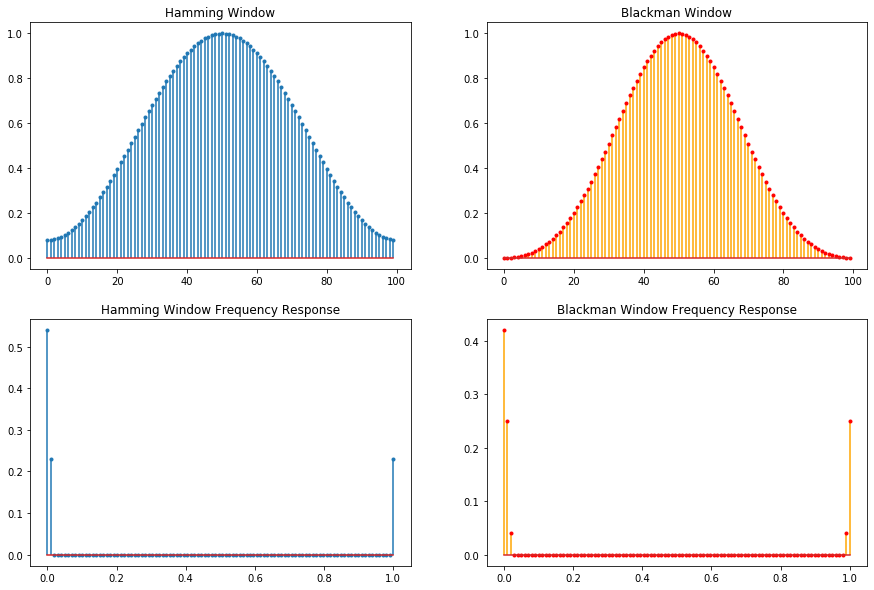

In [13]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.stem(i, hamming, markerfmt='.', use_line_collection=True)
plt.title('Hamming Window')

plt.subplot(2,2,2)
plt.stem(i, blackman, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('Blackman Window')


plt.subplot(2,2,3)
plt.stem(i/np.max(i), normalized_fft_hamming, markerfmt='.', use_line_collection=True)
plt.title('Hamming Window Frequency Response')


plt.subplot(2,2,4)
plt.stem(i/np.max(i), normalized_fft_blackman, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('Blackman Window Frequency Response');


In [14]:
hamming_shited_sinc = normalized_shifted_sinc*hamming
blackman_shited_sinc = normalized_shifted_sinc*blackman

fft_hamming_shited_sinc= np.fft.fft(hamming_shited_sinc)
fft_blackman_shited_sinc= np.fft.fft(blackman_shited_sinc)


normalized_fft_hamming_shited_sinc = np.absolute(fft_hamming_shited_sinc)/np.sum(np.absolute(fft_hamming_shited_sinc))
normalized_fft_blackman_shited_sinc = np.absolute(fft_blackman_shited_sinc)/np.sum(np.absolute(fft_blackman_shited_sinc))

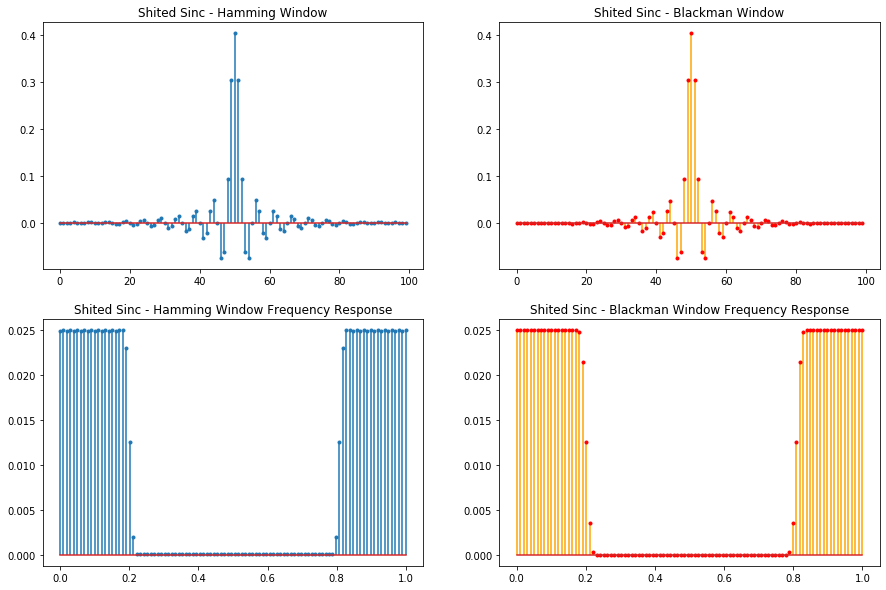

In [15]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.stem(i, hamming_shited_sinc, markerfmt='.', use_line_collection=True)
plt.title('Shited Sinc - Hamming Window')

plt.subplot(2,2,2)
plt.stem(i, blackman_shited_sinc, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('Shited Sinc - Blackman Window')


plt.subplot(2,2,3)
plt.stem(i/np.max(i), normalized_fft_hamming_shited_sinc, markerfmt='.', use_line_collection=True)
plt.title('Shited Sinc - Hamming Window Frequency Response')


plt.subplot(2,2,4)
plt.stem(i/np.max(i), normalized_fft_blackman_shited_sinc, linefmt='orange', markerfmt='r.', use_line_collection=True)
plt.title('Shited Sinc - Blackman Window Frequency Response');

### Comparison between Hamming and Blackman windows
The Hamming window has a **faster roll-off** than the Blackman, however the Blackman has a **better stopband attenuation**. To be exact, the stopband attenuation for the Blackman is greater than the Hamming. Although it cannot be seen in these graphs, the Blackman has a very small passband ripple compared to the the Hamming. In general, the **Blackman should be your first choice**; a slow roll-off is easier to handle than poor stopband attenuation. 

## Example of filter design for an EEG signal
An electroencephalogram, or EEG, is a measurement of the electrical activity of the brain. It can be detected as millivolt level signals appearing on electrodes attached to the surface of the head. Each nerve cell in the brain generates small electrical pulses. The EEG is the combined result of an enormous number of these electrical pulses being generated in a (hopefully) coordinated manner. Although the relationship between thought and this electrical coordination is very poorly understood, different frequencies in the EEG can be identified with specific mental states. If you close your eyes and relax, the predominant EEG pattern will be a slow oscillation between about 7 and 12 hertz. This waveform is called the alpha rhythm, and is associated with contentment and a decreased level of attention. Opening your eyes and looking around causes the EEG to change to the beta rhythm, occurring between about 17 and 20 hertz. Other frequencies and waveforms are seen in children, different depths of sleep, and various brain disorders such as epilepsy.

In this example, we will assume that the EEG signal has been amplified by analog electronics, and then digitized at a sampling rate of 100 samples per second. We have a data of 640 samples. Our goal is to separate the alpha from the beta rhythms. To do this, we will design a digital low-pass filter with a cutoff frequency of 14 hertz, or 0.14 of the sampling rate. The transition bandwidth will be set at 4 hertz, or 0.04 of the sampling rate.

In [24]:
fc = 0.14
BW = 0.04
M = int(4/BW)
i = np.arange(0,M,1)


print("Filter lenght is {}".format(M))

shifted_sinc = shifted_sinc_function(i,fc, M)
normalized_shifted_sinc = shifted_sinc/np.sum(shifted_sinc)
hamming = hamming_window(i, M)
hamming_shited_sinc = normalized_shifted_sinc*hamming

ecg = np.loadtxt(fname = "ecg.dat").flatten()
filtered_ecg = np.convolve(ecg,hamming_shited_sinc)

fft_hamming_shited_sinc= np.fft.fft(hamming_shited_sinc)
normalized_fft_hamming_shited_sinc = np.absolute(fft_hamming_shited_sinc)/np.sum(np.absolute(fft_hamming_shited_sinc))

fft_ecg = np.fft.fft(ecg)
normalized_fft_ecg = np.absolute(fft_ecg)/np.sum(np.absolute(fft_ecg))

fft_filtered_ecg = np.fft.fft(filtered_ecg)
normalized_fft_filtered_ecg = np.absolute(fft_filtered_ecg)/np.sum(np.absolute(fft_filtered_ecg))


Filter lenght is 100


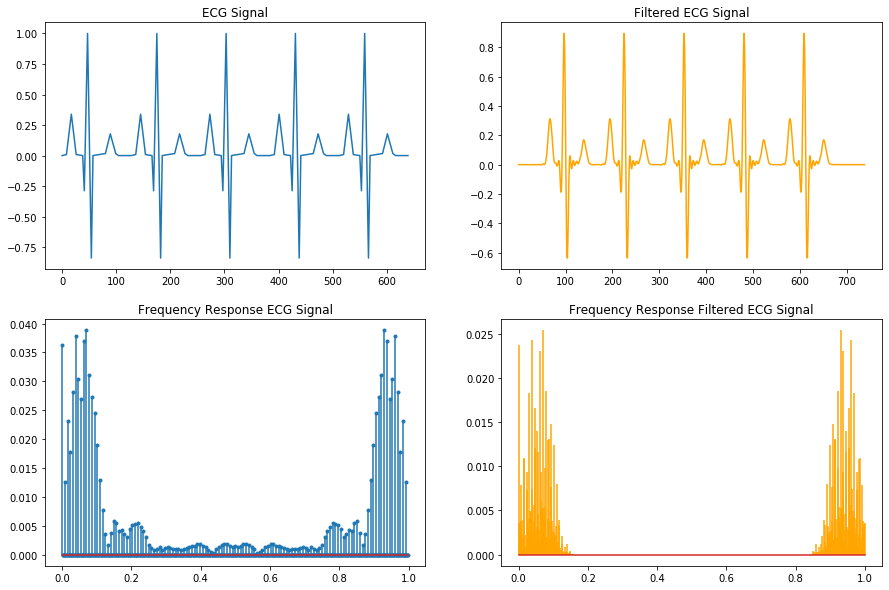

In [25]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2,2,1)
plt.plot(ecg)
plt.title('ECG Signal')

plt.subplot(2,2,2)
plt.plot(filtered_ecg, color='orange')
plt.title('Filtered ECG Signal')


plt.subplot(2,2,3)
plt.stem(np.arange(len(normalized_fft_ecg))/len(normalized_fft_ecg),
         normalized_fft_ecg, markerfmt='.', use_line_collection=True)
plt.title('Frequency Response ECG Signal')


plt.subplot(2,2,4)
plt.stem(np.arange(len(normalized_fft_filtered_ecg))/len(normalized_fft_filtered_ecg),
         normalized_fft_filtered_ecg, linefmt='orange', markerfmt=' ', use_line_collection=True)
plt.title('Frequency Response Filtered ECG Signal');

We will pickle our filter design for later user in the next Jupyter Notebook...

In [26]:
import pickle

data = {'ecg':ecg, 'low_pass':hamming_shited_sinc, 'fft_low_pass':normalized_fft_hamming_shited_sinc}
file = open('save_data.pickle', 'wb')
pickle.dump(data, file)

file.close()